<a href="https://colab.research.google.com/github/Ahmadtito17/PCVK_Ganjil_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama   : Ahmad Tito N.H

NIM    : 2141720265

Kelas  : TI-3G

___________________________________________________________________________

# **Jobsheet 10 - Thresholding**

___________________________________________________________________________

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


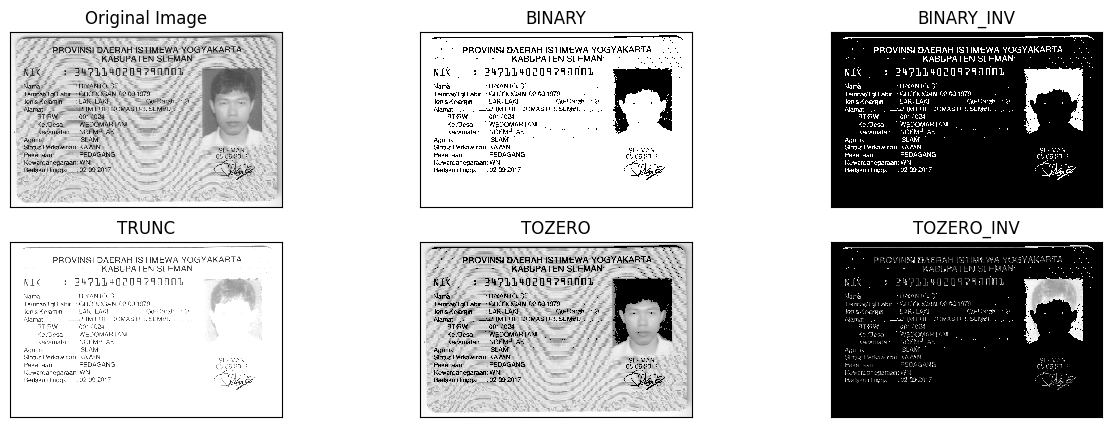

In [3]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

filename = '/content/drive/MyDrive/pcvk/Images/ktp_riyanto.jpg'
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)  # Ubah ke citra keabuan

thresh = 127  # nilai Threshold yang ditentukan

# 1. thresh1 jika pixel di img>127, maka thresh1 bernilai 255 (putih) selain itu bernilai 0 (hitam)
ret, thresh1 = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)

# 2. thresh2 adalah binary threshold inverse
ret, thresh2 = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY_INV)

# 3. Threshold Truncate
ret, thresh3 = cv2.threshold(img, thresh, 255, cv2.THRESH_TRUNC)

# 4. Threshold Tozero
ret, thresh4 = cv2.threshold(img, thresh, 255, cv2.THRESH_TOZERO)

# 5. Threshold Tozero Inverse
ret, thresh5 = cv2.threshold(img, thresh, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(2, 3, i + 1), plt.imshow(images[i], 'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

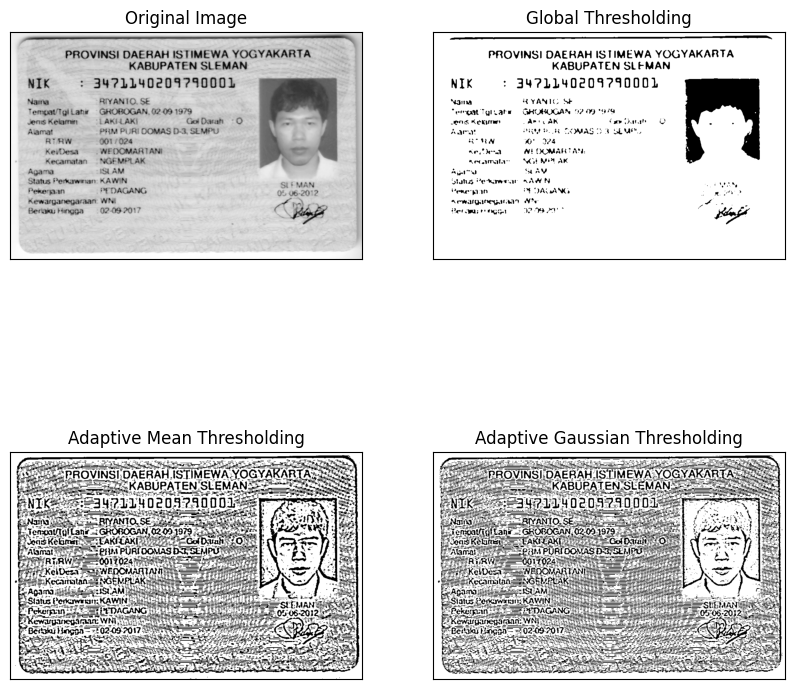

In [5]:
filename = '/content/drive/MyDrive/pcvk/Images/ktp_riyanto.jpg'

# Baca gambar dan aplikasikan median blur
image = cv2.medianBlur(cv2.imread(filename), 5)

# Konversi gambar ke citra keabuan
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Threshold global
thresh_value = 127
ret, global_threshold = cv2.threshold(gray, thresh_value, 255, cv2.THRESH_BINARY)

# Threshold adaptif rata-rata
adaptive_mean_threshold = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2
)

# Threshold adaptif Gaussian
adaptive_gaussian_threshold = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)

# Menampilkan hasil
titles = ['Original Image', 'Global Thresholding', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [gray, global_threshold, adaptive_mean_threshold, adaptive_gaussian_threshold]

plt.figure(figsize=(10, 10))
for i in range(len(images)):
    plt.subplot(2, 2, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

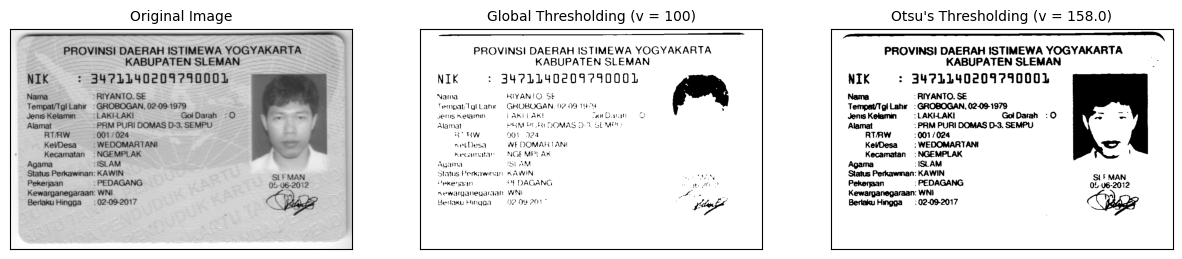

In [7]:
filename = '/content/drive/MyDrive/pcvk/Images/ktp_riyanto.jpg'

# Baca gambar dan konversi ke citra keabuan
img = cv2.imread(filename, 0)

# Terapkan Gaussian Blur
blur = cv2.GaussianBlur(img, (5, 5), 0)

# Ambang batas
thresh = 100
ret, th1 = cv2.threshold(blur, thresh, 255, cv2.THRESH_BINARY)

# Otsu's Thresholding
ret2, th2 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Judul subplot
x = ("Otsu's Thresholding (v = " + str(ret2) + ")")
titles = ['Original Image', 'Global Thresholding (v = 100)', x]
images = [blur, th1, th2]

# Menampilkan subplot
plt.figure(figsize=(15, 5))
for i in range(len(images)):
    plt.subplot(1, 3, i + 1), plt.imshow(images[i], 'gray')
    plt.title(titles[i], fontsize=10)
    plt.xticks([]), plt.yticks([])

plt.show()

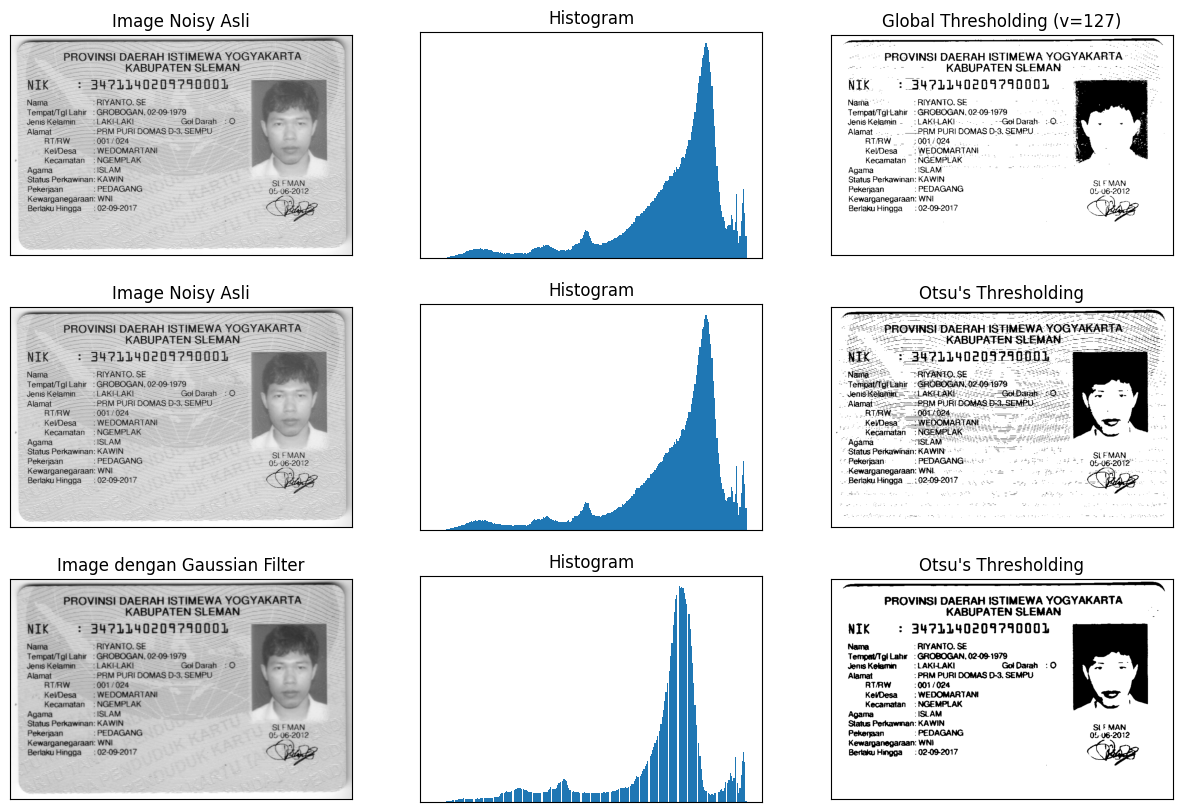

In [9]:
filename = '/content/drive/MyDrive/pcvk/Images/ktp_riyanto.jpg'

# Baca gambar ke citra keabuan
img = cv2.imread(filename, 0)

# Global Thresholding
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Otsu's Thresholding
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Otsu's Thresholding setelah dilakukan Gaussian filtering
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Menyiapkan gambar dan histogram untuk plotting
images = [img, th1, img, th2, blur, th3]
hist_titles = ['Histogram', 'Histogram', 'Histogram']
titles = ['Image Noisy Asli', "Global Thresholding (v=127)",
          "Image Noisy Asli", "Otsu's Thresholding",
          "Image dengan Gaussian Filter", "Otsu's Thresholding"]

# Menampilkan subplot
plt.figure(figsize=(15, 10))
for i in range(3):
    plt.subplot(3, 3, i * 3 + 1), plt.imshow(images[i * 2], 'gray')
    plt.title(titles[i * 2]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i * 3 + 2), plt.hist(images[i * 2].ravel(), 256)
    plt.title(hist_titles[i]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i * 3 + 3), plt.imshow(images[i * 2 + 1], 'gray')
    plt.title(titles[i * 2 + 1]), plt.xticks([]), plt.yticks([])

plt.show()

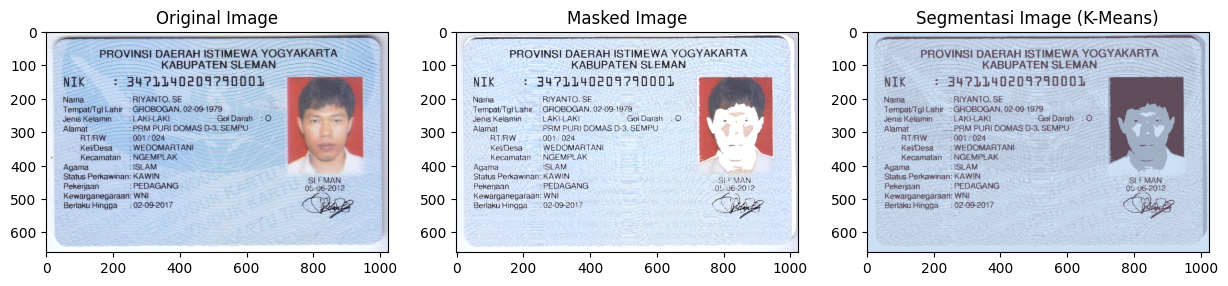

In [15]:
from sklearn.cluster import KMeans

# Load the image
filename = '/content/drive/MyDrive/pcvk/Images/ktp_riyanto.jpg'
img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3# Number of clusters

# Apply K-Means clustering
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into white
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 1
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(img.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(img.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(1, 3, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(1, 3, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(1, 3, 3), plt.imshow(segmented_image)
plt.title('Segmentasi Image (K-Means)')

plt.show()

(<Axes: >, <matplotlib.image.AxesImage at 0x78539e175f00>)

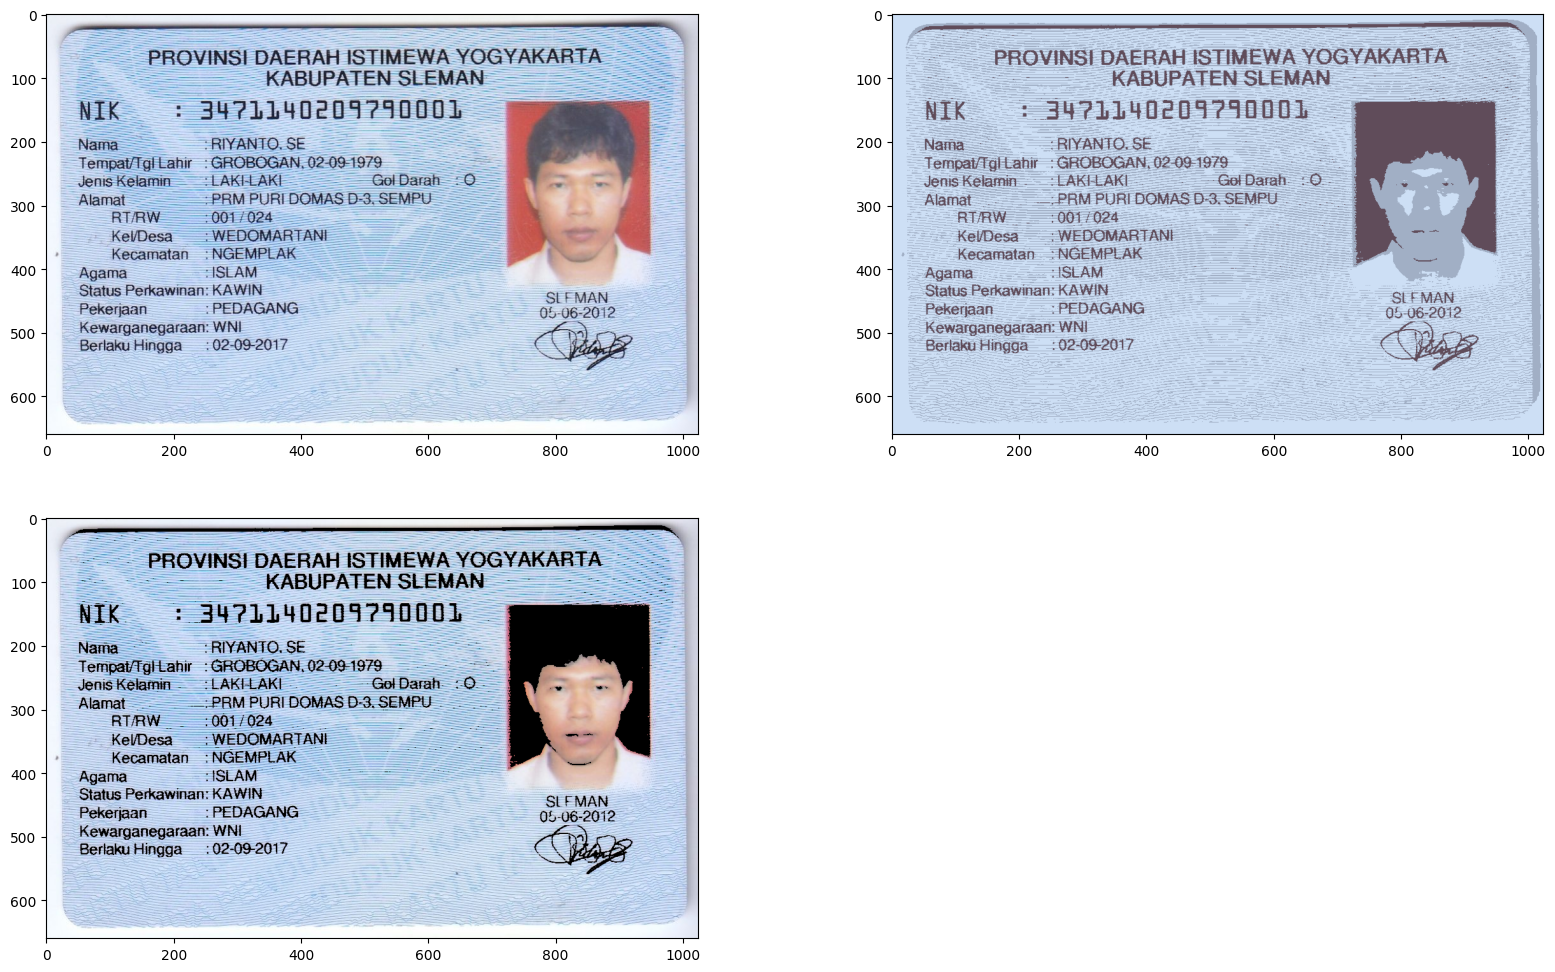

In [16]:
# ubah pixel di cluster 2 menjadi hitam
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)

plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(segmented_image)
plt.subplot(2,2,3),plt.imshow(masked_image)

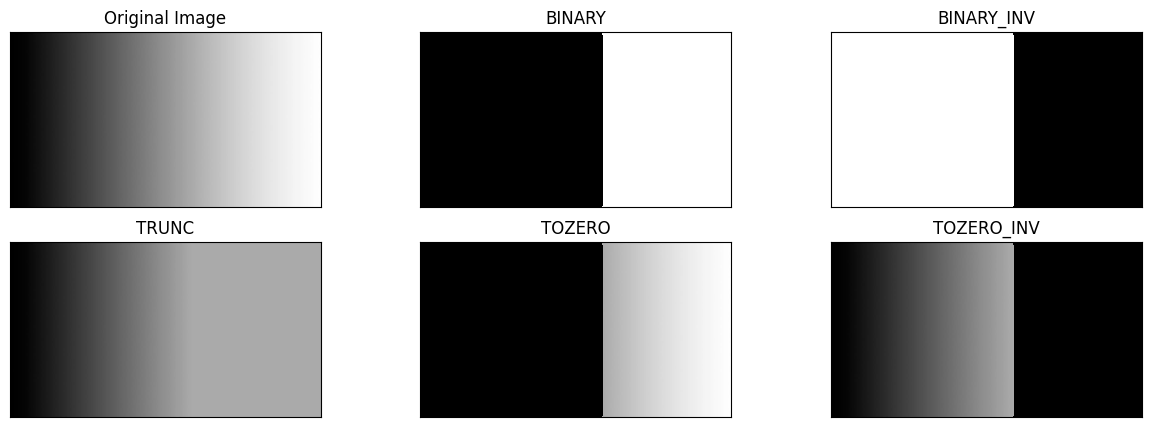

In [17]:
filename = ('/content/drive/MyDrive/pcvk/Images/gradient.jpg')
img = cv2.imread(filename)
thresh1 = cv2.imread(filename)
thresh2 = cv2.imread(filename)
thresh3 = cv2.imread(filename)
thresh4 = cv2.imread(filename)
thresh5 = cv2.imread(filename)
thresh = 170      #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
thresh1[img>thresh] = 255                                        #tanpa library
thresh1[img<=thresh] = 0

#2. thresh2 adalah binary threshold inverse
thresh2 = 255 - thresh1                                          #tanpa library

#3. Threshold Truncate
thresh3[img>thresh] = thresh                                     #tanpa library

#4. Threshold Tozero
thresh4[img<=thresh] = 0                                         #tanpa library

#5. Threshold Tozero Inverse
thresh5[img>thresh] = 0                                          #tanpa library

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

156


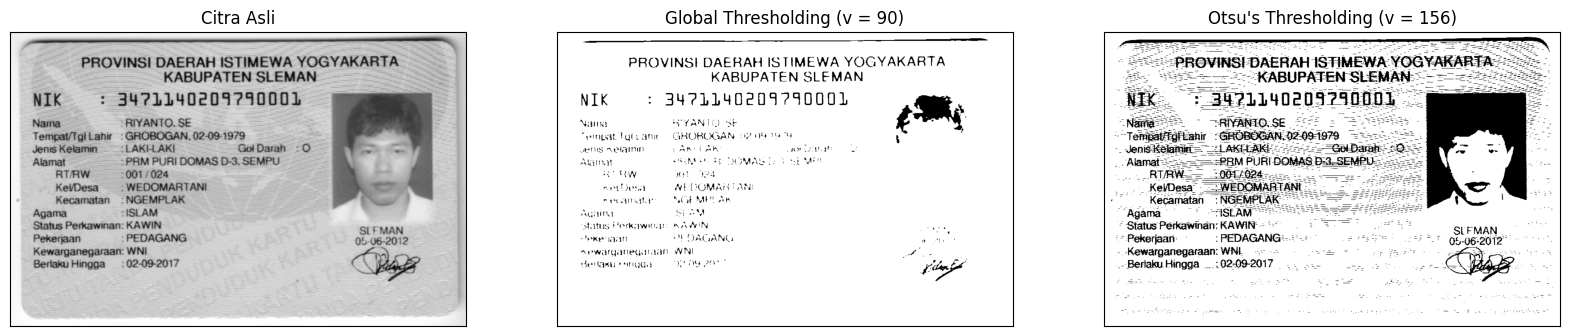

In [18]:
filename = ('/content/drive/MyDrive/pcvk/Images/ktp_riyanto.jpg')
img = cv2.imread(filename,0)
blur = cv2.GaussianBlur(img,(5,5),0)

def otsu(gray):
    pixel_number = gray.shape[0] * gray.shape[1]
    mean_weight = 1.0/pixel_number
    his, bins = np.histogram(gray, np.arange(0,257))
    final_thresh = -1
    final_value = -1
    intensity_arr = np.arange(256)
    for t in bins[1:-1]: # This goes from 1 to 254 uint8 range (Pretty sure wont be those values)
        pcb = np.sum(his[:t])
        pcf = np.sum(his[t:])
        Wb = pcb * mean_weight
        Wf = pcf * mean_weight

        mub = np.sum(intensity_arr[:t]*his[:t]) / float(pcb)
        muf = np.sum(intensity_arr[t:]*his[t:]) / float(pcf)
        #print mub, muf
        value = Wb * Wf * (mub - muf) ** 2

        if value > final_value:
            final_thresh = t
            final_value = value
    final_img = gray.copy()
    print(final_thresh)
    final_img[gray > final_thresh] = 255
    final_img[gray < final_thresh] = 0
    return final_img, final_thresh

otsu_biner, otsu_thresh = otsu(img)
x = ("Otsu's Thresholding (v = ")+str(otsu_thresh)+")"
ret,th1 = cv2.threshold(blur,90,255,cv2.THRESH_BINARY)
#ret,th2 = cv2.threshold(blur,thresh,255,cv2.THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [blur, th1, otsu_biner]

plt.figure(figsize = (20,15))
for i in range(len(citra3)):
    plt.subplot(1,3,i+1),plt.imshow(citra3[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

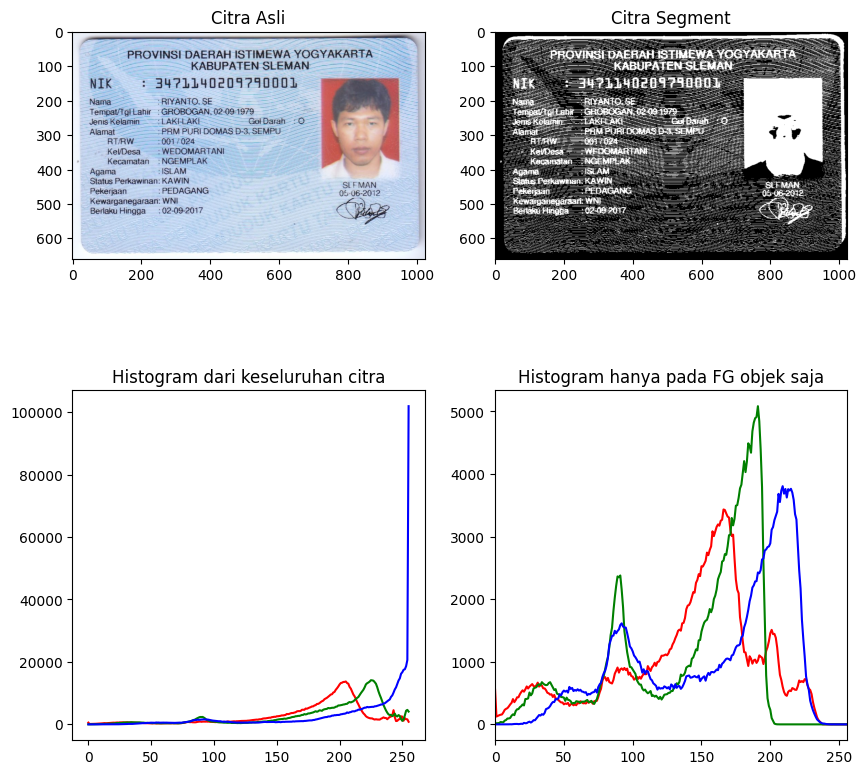

In [19]:
filename = ('/content/drive/MyDrive/pcvk/Images/ktp_riyanto.jpg')

img = cv2.imread(filename)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
    hist0 = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])
plt.show()

(<Axes: >, <matplotlib.image.AxesImage at 0x78539c74b3a0>)

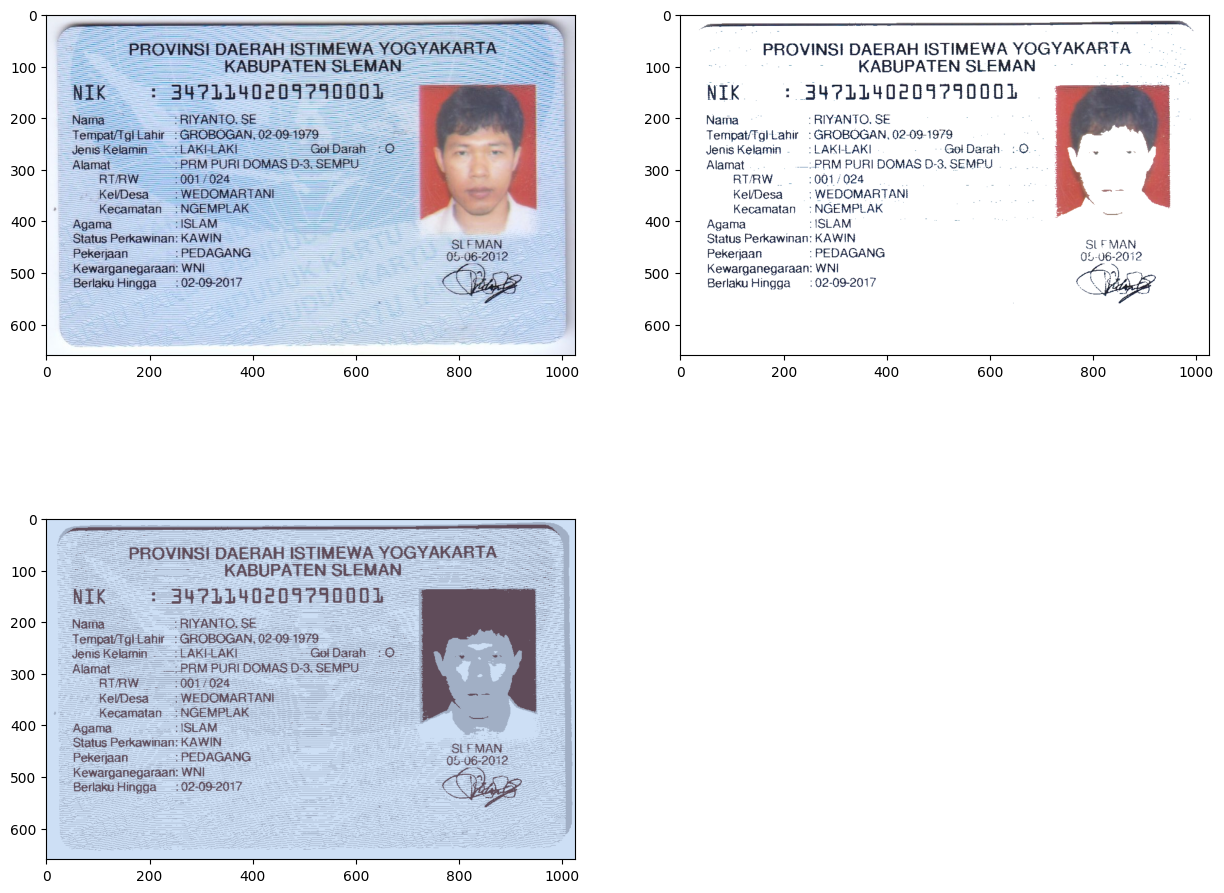

In [20]:
filename = ('/content/drive/MyDrive/pcvk/Images/ktp_riyanto.jpg')

img = cv2.imread(filename)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

'''
kita akan menggunakan fungsi cv2.kmeans() yang meminta array 2D sebagai masukan, sedangkan image aslinya adalah array 3D
selanjutnya kita perlu melakukan flattening array image masukan
'''
#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

'''
syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu banyak pergeseran posisi antara interasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka kita akan hentikan iterasi saat jumlah iterasi = 100
atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di iterasi sebelumnya) < 0.2
'''
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 150, 0.1)

'''
jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan putih/orange). untuk percobaan ini kita akan gunakan
3 cluster untuk image ini
'''
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

#konversi titik centroid kedalam integer
centers = np.uint8(centers)

#flattening label array
labels = labels.flatten()

#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)

masked_image = np.copy(img)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img.shape)

plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(masked_image0)
plt.subplot(2,2,3),plt.imshow(segmented_image)

In [21]:
!pip install pytesseract
!sudo apt-get install tesseract-ocr-ind

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-ind tesseract-ocr-osd
0 upgraded, 4 newly installed, 0 to remove and 9 not upgraded.
Need to get 5,353 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-ind all 1:4.00~git30-7274cfa-1.1 [537 kB]
Fetched 5,353 kB in 3s (1,970 kB/s)
debconf: unable to init

In [22]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [26]:
from pytesseract import pytesseract, Output
import cv2
img = cv2.imread('/content/drive/MyDrive/pcvk/Images/ktp_riyanto.jpg')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


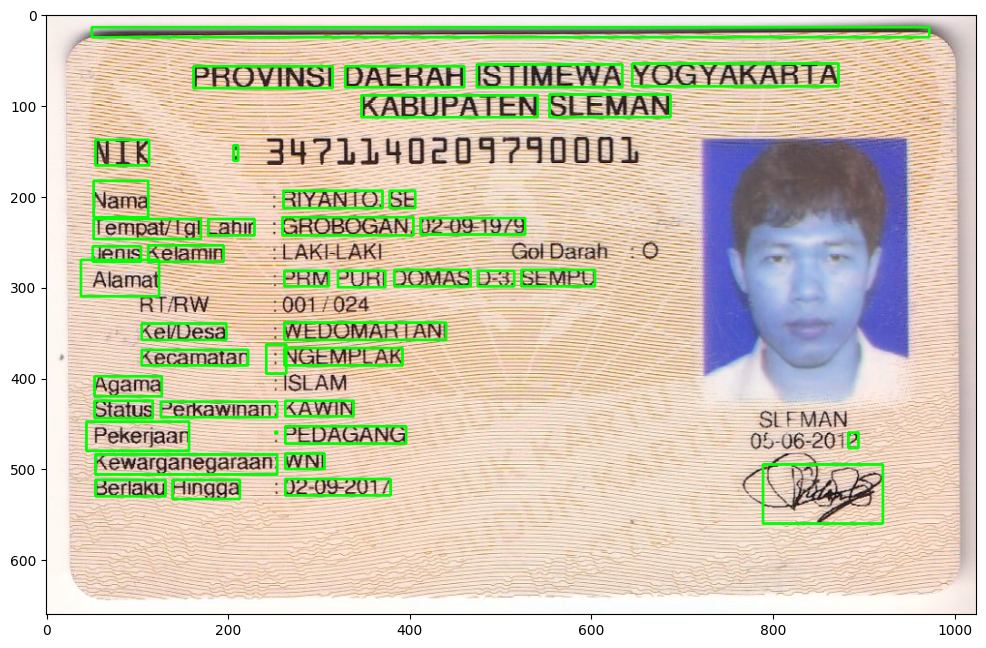

In [30]:
n_boxes = len(text1['text'])
for i in range(n_boxes):
    if int(text1['conf'][i]) > 60:
        (x, y, w, h) = (text1['left'][i], text1['top'][i], text1['width'][i], text1['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
display(img)

 

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

NIK : 34?2140209?900D01 Sk,
Nama RIYANTO. SE £ PA
Tempat/Tgl Lahir : GROBOGAN. 02-09-1979 “ "
Jenis Kelamin LAKI-LAKI GolDarah - 0 "
Alamat PRM PURI DOMAS D-3. SEMPU

RT/RW 001 1024

Kel/Desa WEDOMARTANI!
Kecamatan : NGEMPLAK

Agama :ISLAM

Status Perkawinan: KAWIN ENY
Pekerjaan : PEDAGANG 08 6.20 »
Kewarganegaraan: WNI N

Berlaku Hingga 02-09-2017

 



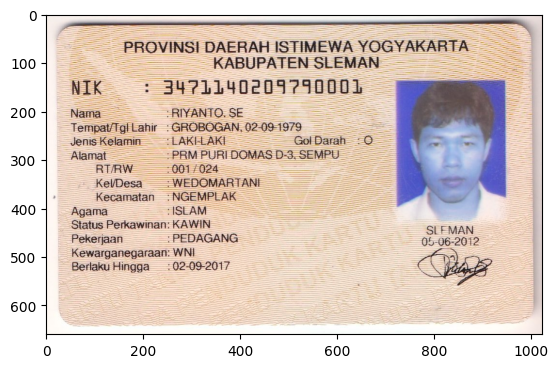

In [29]:
img = cv2.imread("/content/drive/MyDrive/pcvk/Images/ktp_riyanto.jpg")
plt.imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
text1 = pytesseract.image_to_data(threshed,output_type='data.frame')
text2 = pytesseract.image_to_string(threshed, lang="ind")
print(text2)
text = text1[text1.conf != -1]
lines = text.groupby('block_num')['text'].apply(list)
conf = text.groupby(['block_num'])['conf'].mean()
